In [24]:
import pandas as pd
import talib as ta
import matplotlib.pyplot as plt

In [25]:
data = pd.read_csv('stock.csv',parse_dates=['date'])
data['EMA26'] = data['close'].ewm(span=26, adjust=False).mean()
data['EMA12'] = data['close'].ewm(span=12, adjust=False).mean()
data['DIF'] = data['EMA12'] - data['EMA26']
data['DEA'] = data['DIF'].ewm(span=9, adjust=False).mean()
data['MACD'] = (data['DIF'] - data['DEA'])

data['RSI'] = ta.RSI(data['close'], timeperiod=14)

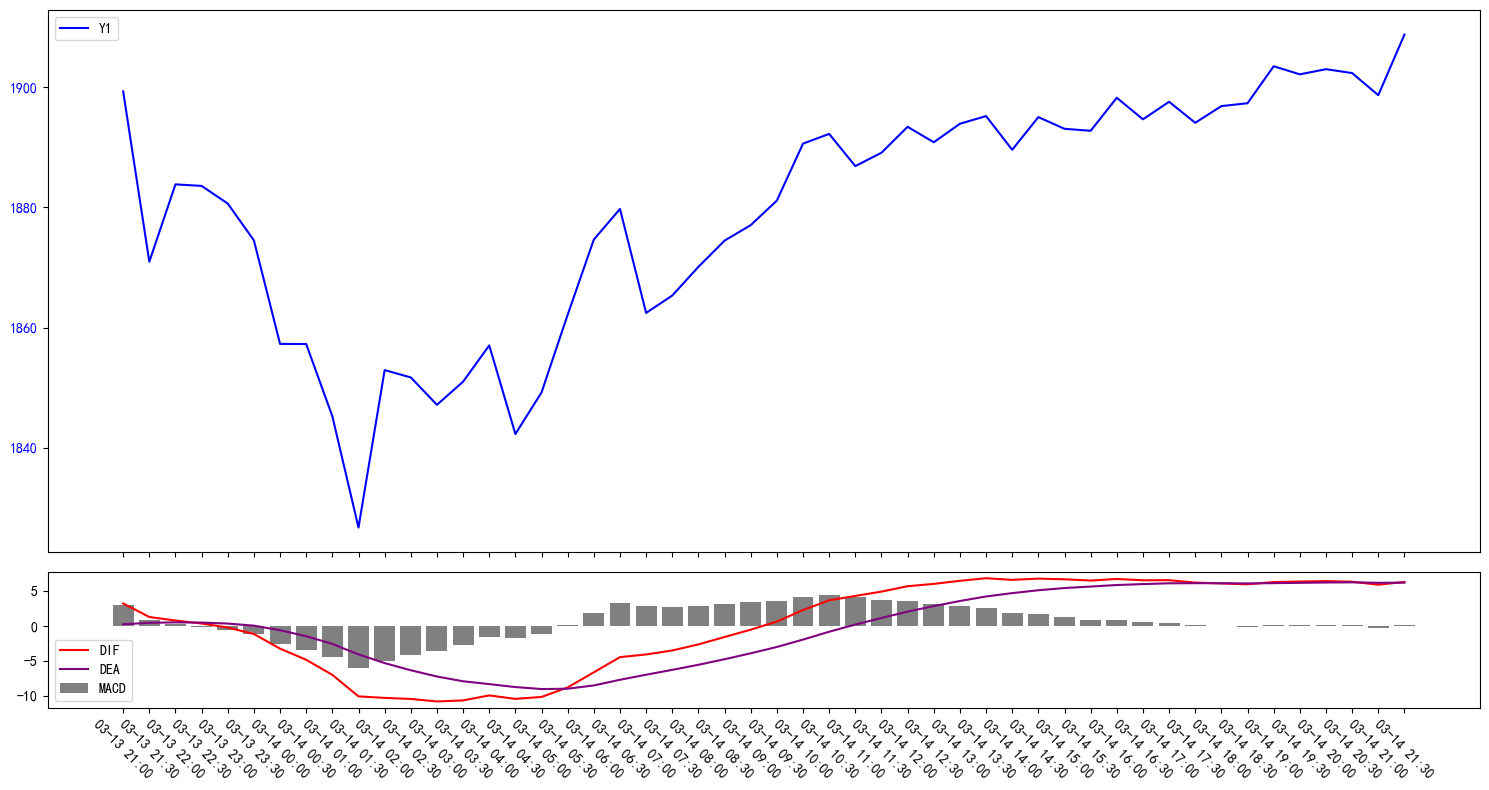

In [26]:
import matplotlib.dates as mdates
n = 50
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# subplots 2，1表示子图行数和列数，  figsize表示画布大小，sharex表示共享x轴, height_ratios表示子图高度比例
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15, 8),height_ratios=[4, 1])

date = data['date'].dt.strftime("%m-%d %H:%M")[-n:]
# ax1.set_ylabel("Y1轴", color='blue')
ax1.plot(date,data['close'][-n:],color='blue', label='Y1')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

ax2.plot(date,data['DIF'][-n:], label='DIF', color='red')
ax2.plot(date,data['DEA'][-n:], label='DEA', color='purple')
ax2.bar(date, data['MACD'][-n:], color='gray', label='MACD')
ax2.tick_params(axis='y', left=True)

plt.legend()
# ax = plt.gca()
# ax2.xaxis.set_major_locator(mdates.MinuteLocator(interval=3))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# 调整布局，腾出右侧空间
plt.subplots_adjust(right=0.85)
# 倾斜比例
plt.xticks(rotation=-45)
# plt.gcf().autofmt_xdate()
plt.tight_layout()

plt.show()

In [27]:
# print(data.describe().transpose())